# 이변량 분석 실습

## 환경준비

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

## 문제 출처: https://github.com/DA4BAM/dataset

# 1.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [49]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
target = 'Survived'
target_mean = titanic[target].mean()

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [51]:
feature = 'Age'

1) 그래프 : histogram, densityplot

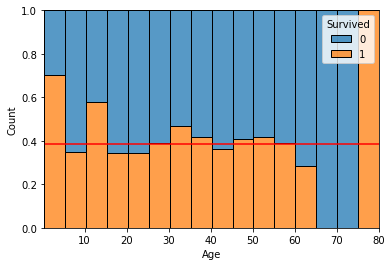

In [52]:
sns.histplot(x = feature, data = titanic, hue = target, multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

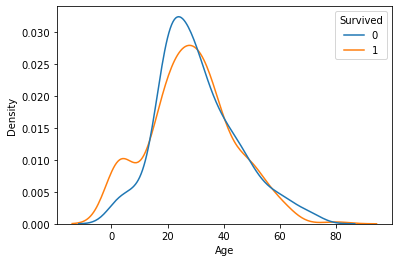

In [53]:
sns.kdeplot(x = feature, data = titanic, hue = target, common_norm = False)
plt.show()

2) 수치화 : 로지스틱회귀

In [55]:
# 로지스틱 모형을 이용한 통계량 구하기
temp = titanic.loc[titanic[feature].notnull()]
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

* 그래프상에서, 
    * 10대 이하의 탑승객이 전체 평균대비 생존율이 높고,  20 ~ 60대 사이의 생존률이 상대적으로 낮음.
    * 나이에 따라서 생존여부가 크게 차이 나진 않지만 관계는 있어 보임.
* 로지스틱회귀로 부터
    * p-value는 0.05보다 작게 나옴.

* 결론 : 두 변수간에는 관계가 있음. (강하진 않음)

4) 추가 분석할 내용 정리

* 나이에 따른 생존여부 그래프가 교차 되는 지점이 많이  보임. 따라서 나이대를 적절히 나눠 확인해 볼 필요가 있음.

#### ② Fare --> Survived

In [56]:
feature = 'Fare'

1) 그래프 : histogram, densityplot

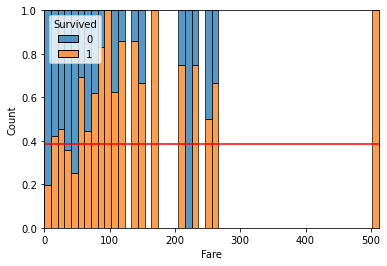

In [57]:
sns.histplot(x = feature, data = titanic, hue = target, multiple = 'fill', bins = 50)
# 전체 구간이 0~512 달러 이므로,  대략 한 구간이 10달러 정도 되도록 50으로 나눔.
plt.axhline(target_mean, color = 'r')
plt.show()

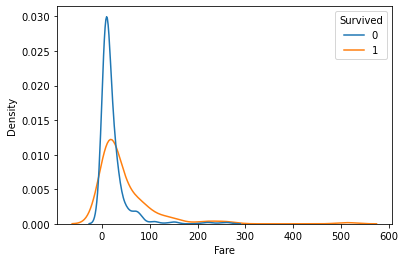

In [58]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm=False)
plt.show()

2) 수치화 : 로지스틱회귀

In [59]:
# 로지스틱 모형을 이용한 통계량 구하기
model = sm.Logit(titanic[target], titanic[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

* 그래프상에서, 
    * 각 운임 비용 구간별로 생존률이 달라지는 것을 확인 가능.
    * 그래프상으로는 나이보다, 운임 비용이 더 관련이 높아 보임.
* 로지스틱회귀로 부터
    * p 값은 0.05보다 작게 나옴.

* 결론 : p 값이 0.05 와 차이가 크지 않다면 약한 관계로 볼 수 있음.

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [61]:
feature = 'Sex'

1) 교차표

In [70]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


2) 시각화( Stacked Bar, Mosaic)

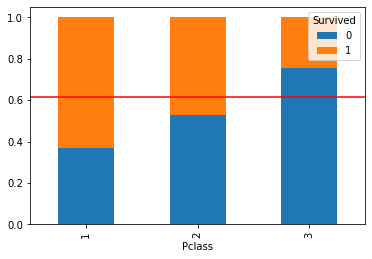

In [71]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked = True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

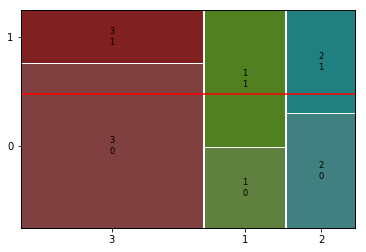

In [72]:
mosaic(titanic, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [73]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23


4) 관계 평가하기

* 성별과 생존여부는 매우 관련이 높아 보임.

#### ② Pclass --> Survived

In [74]:
feature = 'Pclass'

1) 교차표

In [75]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


2) 시각화( Stacked Bar, Mosaic)

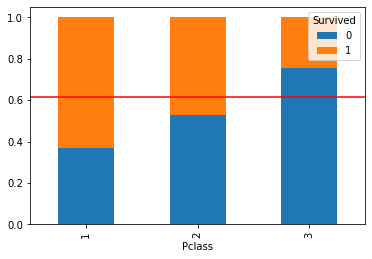

In [76]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked = True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

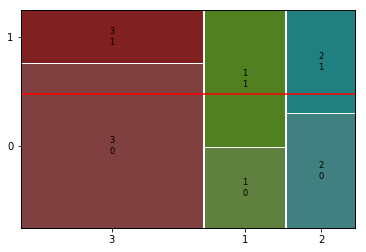

In [77]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [78]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23


4) 관계 평가하기

* 객실 등급과 생존여부는 매우 관련이 높아 보임.
* 성별과 P 값으로 비교해보면, 객실등급보다 성별이 더 강한 관계를 갖고 있다고 볼수 있음.
* 카이제곱 통계량은 자유도가 다르기 때문에 비교하면 안됨.

#### ③ Embarked --> Survived

In [79]:
feature = 'Embarked'

1) 교차표(pd.crosstab())

In [81]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


2) 시각화( Stacked Bar, Mosaic)

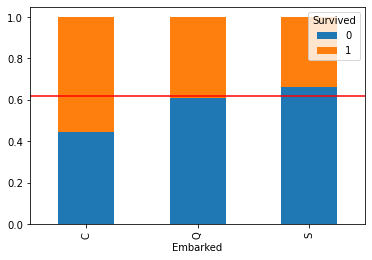

In [82]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked = True)
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

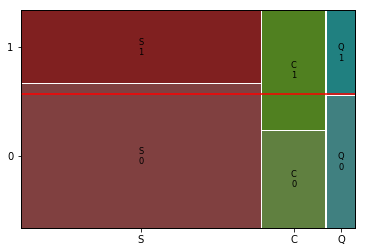

In [83]:
mosaic(titanic, [ feature, target])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [84]:
table = pd.crosstab(titanic[target], titanic[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06


4) 관계 평가하기

* 승선지역과 아주 강한 관계는 아니지만 어느정도 생존여부는 관련이 있음.

### (3) 관계 정리하기

① 강한관계

* 성별, 객실등급, 운임 비용

② 중간관계

* 나이, 승선지역

③ 관계없음

* 없음

# 2.숫자형 Y

## 2.1 보스톤 집값 데이터 : 기본

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수. 단위 1000달러)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [85]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


* target : medv



In [86]:
target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

In [87]:
feature = 'crim'

1) 시각화 : scatter, jointplot 

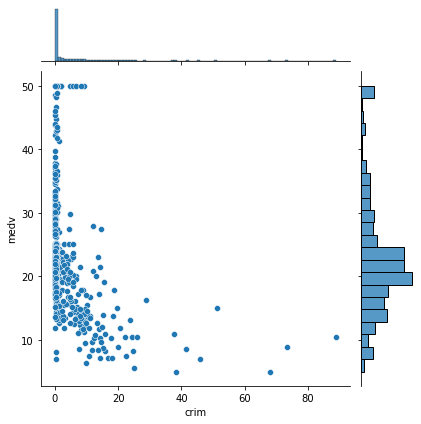

In [88]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [89]:
spst.pearsonr(boston[feature], boston[target])

(-0.3883046085868116, 1.1739870821941207e-19)

3) 관계 평가하기

* 범죄율이 높아질수록 집값은 낮아지는 경향이 보임.
* 상관계수가 -0.388 이므로 중간 정도의 관계로 볼 수 있음.
* 여기서 P-value는 상관계수가 0인지 아닌지에 대한 검정 의미임.

#### ② ptratio(교사학생 비율) --> medv(집값)

In [90]:
feature = 'ptratio'

1) 시각화 : scatter, jointplot 

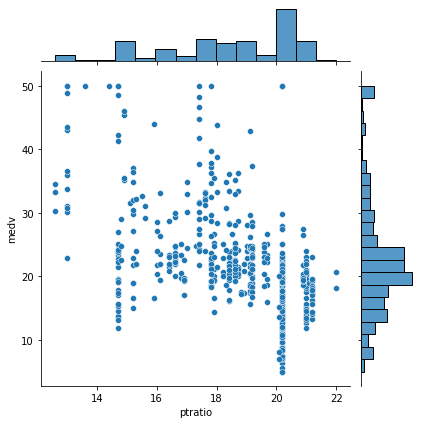

In [91]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [92]:
spst.pearsonr(boston[feature], boston[target])

(-0.507786685537562, 1.609509478472518e-34)

3) 관계 평가하기

* 꽤 강한 상관관계를 보임.

#### ③ lstat(하위계층 비율) --> medv(집값)

In [95]:
feature = 'lstat'

1) 시각화 : scatter, jointplot 

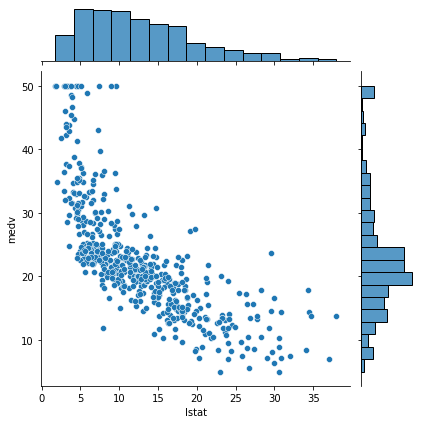

In [96]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [97]:
spst.pearsonr(boston[feature], boston[target])

(-0.7376627261740148, 5.08110339438697e-88)

3) 관계 평가하기

* 상관관계가 매우 강해보임.

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

In [98]:
feature = 'chas'

1) 시각화 : 평균비교 barplot

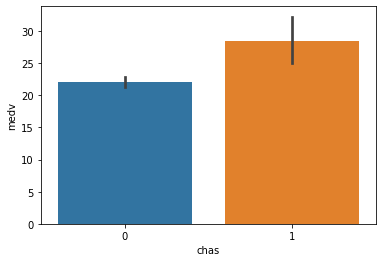

In [103]:
sns.barplot(x = feature, y = target, data=boston)
plt.show()

2) 수치화 : t-test

In [104]:
chas0 = boston.loc[boston[feature] == 0, target]
chas1 = boston.loc[boston[feature] == 1, target]

In [105]:
spst.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

* 그래프와 수치로 볼 때 관계가 있어 보이나 강하진 않음.

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

In [106]:
feature = 'zn2'

1) 시각화 : 평균비교 barplot

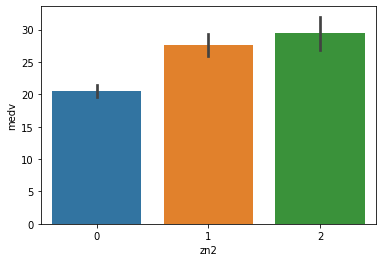

In [108]:
sns.barplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : anova

In [109]:
zn2_0 = boston.loc[boston[feature] == 0, target]
zn2_1 = boston.loc[boston[feature] == 1, target]
zn2_2 = boston.loc[boston[feature] == 2, target]

In [110]:
spst.f_oneway(zn2_0, zn2_1, zn2_2)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

대저택 비율과 집값은 강한 관계를 보임.

### (3) 관계 정리하기

① 강한관계

lstat, ptratio2, zn2

② 중간관계

chas, crim

③ 관계없음

## 2.2 car seat 매출 분석 : 심화

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|


In [111]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [112]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

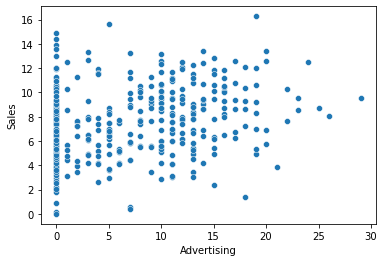

In [113]:
var = 'Advertising'
sns.scatterplot(x=var, y = target, data = data)
plt.show()

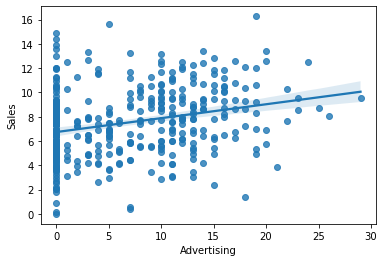

In [114]:
sns.regplot(x=var, y = target, data = data)
plt.show()

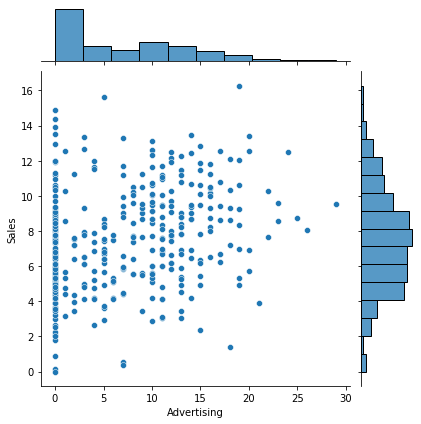

In [115]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [116]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고 예산에 따라 판매량은 약한 관계에 있음.
* 광고 예산이 0인 지역이 대부분이기 때문에 이를 빼고 비교해 볼 필요가 있음.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

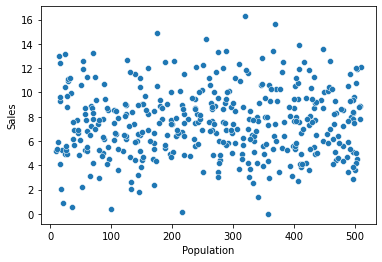

In [119]:
var = 'Population'
sns.scatterplot(x = var, y = target, data = data)
plt.show()

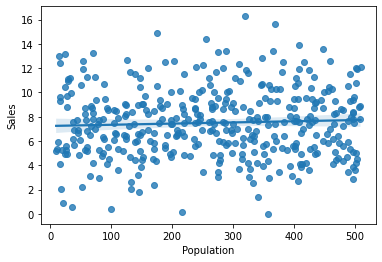

In [120]:
sns.regplot(x = var, y = target, data = data)
plt.show()

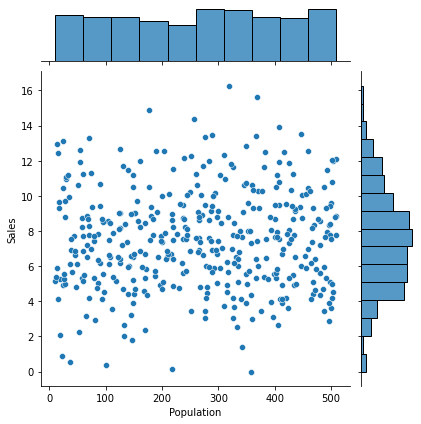

In [121]:
sns.jointplot(x = var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [122]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 인구수에 따른 판매량차이가 없어 보임.
* 이는 인구수가 많을 수록 판매량이 증가한다는 기본적인 생각과 다름. 즉, 카시트는 영유아기 아이들이 사용하며, 해당 부모들이 구매하기 때문에 인구수가 아니라 기혼인들의 수를 파악할 필요가 있음.

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

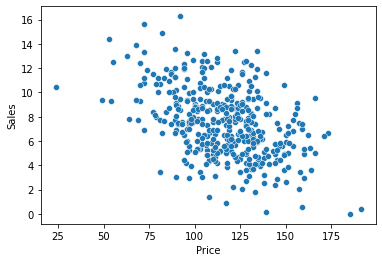

In [124]:
var = 'Price'
sns.scatterplot(x = var, y = target, data = data)
plt.show()

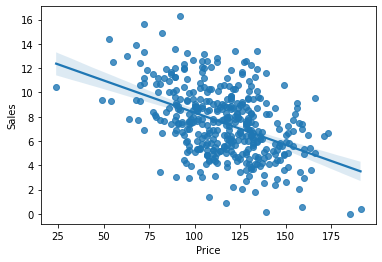

In [125]:
sns.regplot(x = var, y = target, data = data)
plt.show()

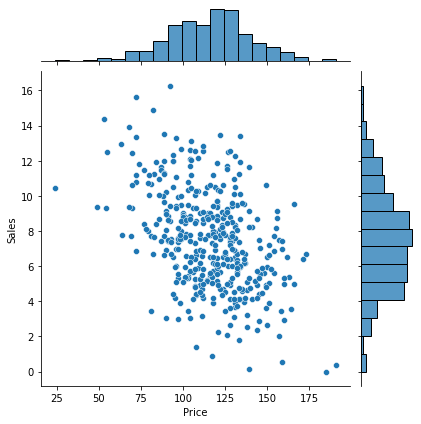

In [126]:
sns.jointplot(x = var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [127]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 삼풍 가격이 높을 수록 판매액은 감소, 상관관계는 수치상 강하지 않음.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

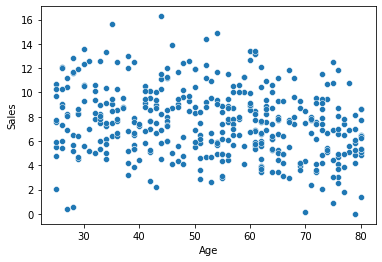

In [128]:
var = 'Age'
sns.scatterplot(x = var, y = target, data = data)
plt.show()

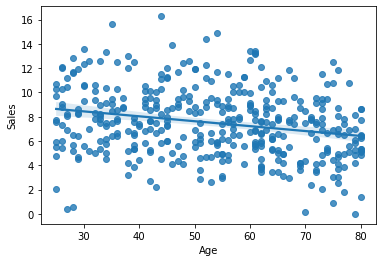

In [129]:
sns.regplot(x = var, y = target, data = data)
plt.show()

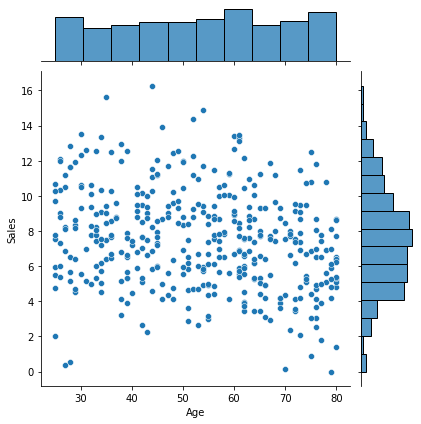

In [130]:
sns.jointplot(x = var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [131]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

평균 연령에 따라 판매량에는 차이가 있으나 아주 약한 관계임.

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

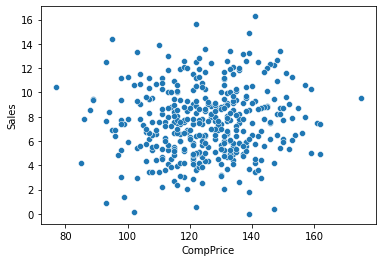

In [133]:
var = 'CompPrice'
sns.scatterplot(x = var, y = target, data = data)
plt.show()

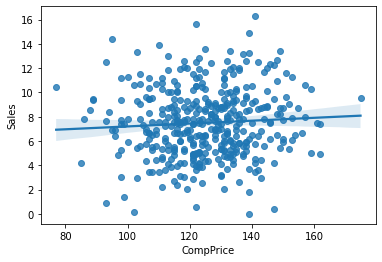

In [134]:
sns.regplot(x = var, y = target, data = data)
plt.show()

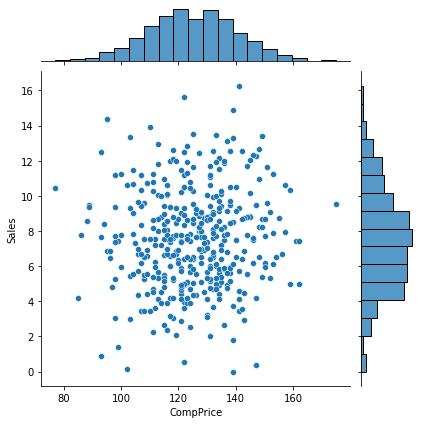

In [135]:
sns.jointplot(x = var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [136]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 관계가 전혀 없어보임.
- 그러나 경쟁사와의 가격과 자사에 판매액 간에 관계가 아무 관계가 없다는 것은 믿기 힘듦
- 따라서 경쟁사의 제품 가격이 아닌 자사 제품 가격과 경쟁사의 제품 가격의 차이를 볼 필요가 있음.

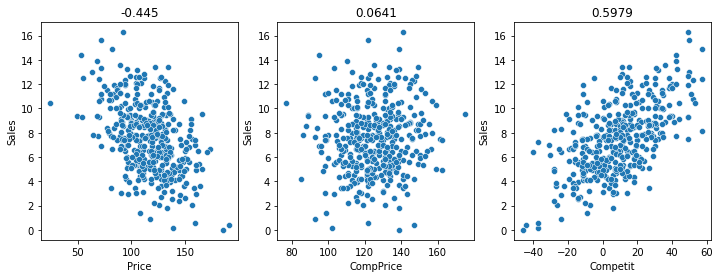

In [138]:
data['Competit'] = data['CompPrice'] - data['Price']

plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Price', y ='Sales', data = data)
result = spst.pearsonr(data['Price'], data['Sales'])
plt.title(round(result[0],4))

plt.subplot(1,3,2)
sns.scatterplot(x = 'CompPrice', y ='Sales', data = data)
result = spst.pearsonr(data['CompPrice'], data['Sales'])
plt.title(round(result[0],4))

plt.subplot(1,3,3)
sns.scatterplot(x = 'Competit', y ='Sales', data = data)
result = spst.pearsonr(data['Competit'], data['Sales'])
plt.title(round(result[0],4))
plt.show()

# 관계가 있음을 확인함.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

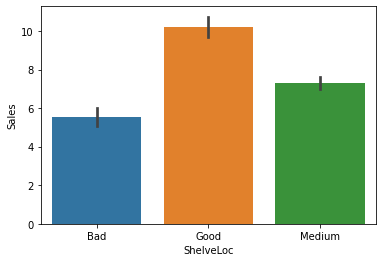

In [139]:
var = 'ShelveLoc'
sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [140]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]
spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 진열상태와 판매량은 강한 관계를 가짐.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

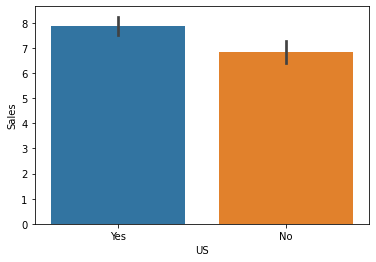

In [141]:
var = 'US'
sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [142]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]
spst.ttest_ind(d_y, d_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 국내외에 따른 판매량 차이는 있으나, 그렇게 큰 관계는 아님.

### (3) 관계 정리하기

① 강한관계

선반진열상태, 가격경쟁력

② 중간관계

광고비, 자사상품 가격, 평균연령, US

③ 관계없음

인구수, 경쟁사 가격